# <h1>Importing Libraries</h1>

In [ ]:
!pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

     \ 306 kB 2.5 MB/s
  Created wheel for mpl-finance: filename=mpl_finance-0.10.1-py3-none-any.whl size=8436 sha256=b136cffa01afce85130c7ccc17958859d60932fdec99a8a33cbdf3227c3151bf
  Stored in directory: /tmp/pip-ephem-wheel-cache-t4__ue4d/wheels/eb/17/99/0f3929e635912eb25fc346aaf43b4ee3da4a80dee8ce3d2e4f
Successfully built mpl-finance


In [ ]:
!pip install plotly

In [ ]:
import math 
import numpy as np
import pandas as pd
import datetime as dt
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Normalizer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential 
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping

#Graphing/Visualization
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc
import plotly
import plotly.graph_objs as go 
import plotly.express as px
import seaborn as sn
import matplotlib.pyplot as plt

# Data Collection

Web scrapping code here

# Loading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ahpc = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Stock Prediction/ahpc.csv')
ahpc

,S.N.,Date,Open,High,Low,Ltp,% Change,Qty,Turnover
0,1,2022-05-05,386.0,397.0,380.0,382.0,-1.82,"107,184.00","41,256,839.10"
1,2,2022-05-04,396.0,402.9,384.0,389.1,-1.67,"117,403.00","45,896,659.00"
2,3,2022-05-02,417.0,417.0,395.0,395.7,-5.15,"118,072.00","47,356,743.50"
3,4,2022-04-28,429.0,431.9,416.9,417.2,-1.14,"111,687.00","47,334,634.20"
4,5,2022-04-27,420.0,424.8,407.0,422.0,1.69,"124,757.00","52,113,332.40"
...,...,...,...,...,...,...,...,...,...
2741,2742,2009-12-08,661.0,701.0,648.0,700.0,0.00,"3,230.00",0.00
2742,2743,2009-12-07,687.0,674.0,661.0,661.0,0.00,20.00,0.00
2743,2744,2009-12-06,740.0,726.0,687.0,687.0,0.00,50.00,0.00
2744,2745,2009-12-03,790.0,770.0,740.0,740.0,0.00,50.00,0.00


# Data Pre-processing

**Removing all commas.**

In [ ]:
ahpc[ahpc.columns[2:]] = ahpc[ahpc.columns[2:]].replace(',','',regex=True).astype('float64')

In [ ]:
ahpc

,S.N.,Date,Open,High,Low,Ltp,% Change,Qty,Turnover
0,1,2022-05-05,386.0,397.0,380.0,382.0,-1.82,107184.0,41256839.1
1,2,2022-05-04,396.0,402.9,384.0,389.1,-1.67,117403.0,45896659.0
2,3,2022-05-02,417.0,417.0,395.0,395.7,-5.15,118072.0,47356743.5
3,4,2022-04-28,429.0,431.9,416.9,417.2,-1.14,111687.0,47334634.2
4,5,2022-04-27,420.0,424.8,407.0,422.0,1.69,124757.0,52113332.4
...,...,...,...,...,...,...,...,...,...
2741,2742,2009-12-08,661.0,701.0,648.0,700.0,0.00,3230.0,0.0
2742,2743,2009-12-07,687.0,674.0,661.0,661.0,0.00,20.0,0.0
2743,2744,2009-12-06,740.0,726.0,687.0,687.0,0.00,50.0,0.0
2744,2745,2009-12-03,790.0,770.0,740.0,740.0,0.00,50.0,0.0


**Dropping unneeded column**

In [ ]:
ahpc.drop(['S.N.'], axis = 1, inplace=True)

In [ ]:
ahpc

,Date,Open,High,Low,Ltp,% Change,Qty,Turnover
0,2022-05-05,386.0,397.0,380.0,382.0,-1.82,107184.0,41256839.1
1,2022-05-04,396.0,402.9,384.0,389.1,-1.67,117403.0,45896659.0
2,2022-05-02,417.0,417.0,395.0,395.7,-5.15,118072.0,47356743.5
3,2022-04-28,429.0,431.9,416.9,417.2,-1.14,111687.0,47334634.2
4,2022-04-27,420.0,424.8,407.0,422.0,1.69,124757.0,52113332.4
...,...,...,...,...,...,...,...,...
2741,2009-12-08,661.0,701.0,648.0,700.0,0.00,3230.0,0.0
2742,2009-12-07,687.0,674.0,661.0,661.0,0.00,20.0,0.0
2743,2009-12-06,740.0,726.0,687.0,687.0,0.00,50.0,0.0
2744,2009-12-03,790.0,770.0,740.0,740.0,0.00,50.0,0.0


**Converting the columns to right datatypes.**

In [ ]:
ahpc.Date = pd.to_datetime(ahpc.Date)

In [ ]:
ahpc.dtypes

Date        datetime64[ns]
Open               float64
High               float64
Low                float64
Ltp                float64
% Change           float64
Qty                float64
Turnover           float64
dtype: object

**Arranging data in ascending order by date**

In [ ]:
ahpc = ahpc.reindex(index=ahpc.index[::-1])
ahpc.head()

,Date,Open,High,Low,Ltp,% Change,Qty,Turnover
2745,2009-11-25,408.0,790.0,790.0,790.0,0.0,10.0,0.0
2744,2009-12-03,790.0,770.0,740.0,740.0,0.0,50.0,0.0
2743,2009-12-06,740.0,726.0,687.0,687.0,0.0,50.0,0.0
2742,2009-12-07,687.0,674.0,661.0,661.0,0.0,20.0,0.0
2741,2009-12-08,661.0,701.0,648.0,700.0,0.0,3230.0,0.0


<h1>Finding the correlation</h1>

               Qty      High       Low  Turnover      Open  % Change
Qty       1.000000  0.350928  0.319666  0.961985  0.335829  0.191254
High      0.350928  1.000000  0.997898  0.393990  0.996385  0.002698
Low       0.319666  0.997898  1.000000  0.367394  0.996205 -0.003541
Turnover  0.961985  0.393990  0.367394  1.000000  0.381142  0.131186
Open      0.335829  0.996385  0.996205  0.381142  1.000000 -0.017932
% Change  0.191254  0.002698 -0.003541  0.131186 -0.017932  1.000000


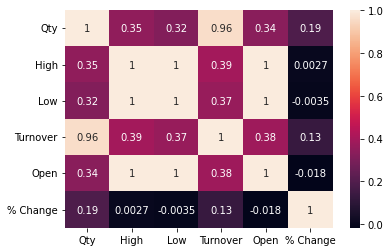

In [ ]:
cor_data = ahpc[["Qty","High","Low","Turnover","Open","% Change"]]
cor_val = cor_data.corr()
print(cor_val)
sn.heatmap(cor_val, annot=True)
plt.show()

**Features Visualization**




In [ ]:
df = ahpc
fig = go.Figure(go.Candlestick(x=df['Date'],
  open=df['Open'],
  high=df['High'],
  low=df['Low'],
  close=df['Ltp']))
fig.update_layout(
    title={
        'text': "Candlestick Chart of Arun Valley Hydropower Development Co. Ltd. (AHPC)",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_xaxes(
    dtick="M12")
fig.show()

In [ ]:
df = ahpc
fig = go.Figure(go.Scatter(
    x = df['Date'],
    y = df['Ltp']
))
fig.update_xaxes(
    dtick="M12",
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.update_layout(
    title={
        'text': "LTP lineplot of Arun Valley Hydropower Development Co. Ltd. (AHPC)",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis_title='Years',
                   yaxis_title='Last Transaction Price (Rs)')
fig.show()

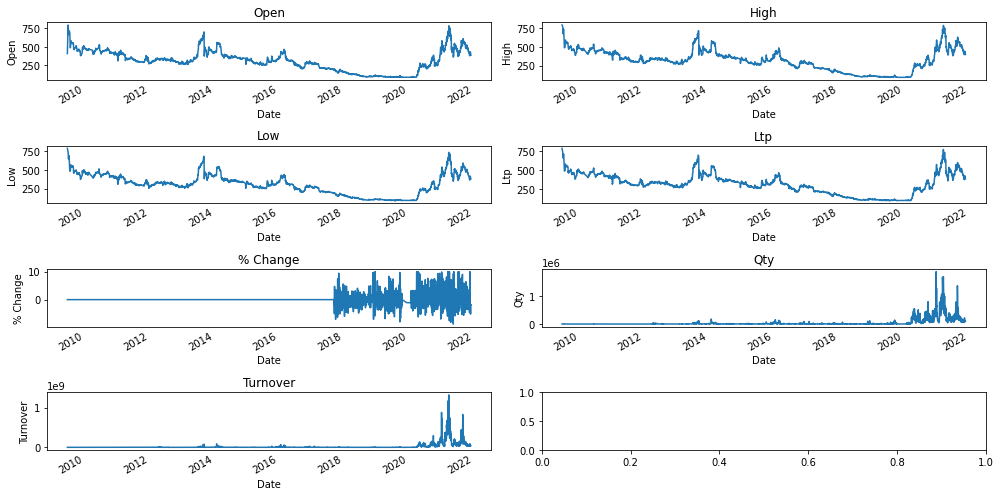

In [ ]:
df_plot = ahpc.copy()
df_plot.set_index('Date', inplace=True)
df_plot.index = pd.to_datetime(df_plot.index)

list_length = df_plot.shape[1]
ncols = 2
nrows = int(round(list_length / ncols, 0))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(14, 7))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(0, list_length):
        ax = plt.subplot(nrows,ncols,i+1)
        sn.lineplot(data = df_plot.iloc[:, i], ax=ax)
        ax.set_title(df_plot.columns[i])
        ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
fig.tight_layout()
plt.show()


###Features Selection

In [ ]:
features = ['High', 'Low', 'Open', 'Ltp'
            #'Qty',   #'Date', 'Turnover', "% Change"
           ]

print(f'FEATURE LIST : {features}') 

data_filtered = ahpc[features]

#prediction column and set dummy values to prepare the data for scaling
data_filtered_ext = data_filtered.copy()
data_filtered_ext['Prediction'] = data_filtered_ext['Ltp']

data_filtered_ext.head()

FEATURE LIST : ['High', 'Low', 'Open', 'Ltp']


,High,Low,Open,Ltp,Prediction
2745,790.0,790.0,408.0,790.0,790.0
2744,770.0,740.0,790.0,740.0,740.0
2743,726.0,687.0,740.0,687.0,687.0
2742,674.0,661.0,687.0,661.0,661.0
2741,701.0,648.0,661.0,700.0,700.0


In [ ]:
final_df = ahpc.copy()

# Copying of the dates index, before reindexing
date_index = final_df['Date']

final_df = final_df.reset_index(drop=True).copy()
final_df.head(5)

,Date,Open,High,Low,Ltp,% Change,Qty,Turnover
0,2009-11-25,408.0,790.0,790.0,790.0,0.0,10.0,0.0
1,2009-12-03,790.0,770.0,740.0,740.0,0.0,50.0,0.0
2,2009-12-06,740.0,726.0,687.0,687.0,0.0,50.0,0.0
3,2009-12-07,687.0,674.0,661.0,661.0,0.0,20.0,0.0
4,2009-12-08,661.0,701.0,648.0,700.0,0.0,3230.0,0.0


In [ ]:
# Feature Selection for y- Only Close Data/ Last Transaction Price
df_ltp = data_filtered.filter(['Ltp'])

In [ ]:
#Convert the dataset to matrix form
unscaled_data = data_filtered.values
unscaled_data

array([[790. , 790. , 408. , 790. ],
       [770. , 740. , 790. , 740. ],
       [726. , 687. , 740. , 687. ],
       ...,
       [417. , 395. , 417. , 395.7],
       [402.9, 384. , 396. , 389.1],
       [397. , 380. , 386. , 382. ]])

**Data Scaling**

Transform features by scaling each feature to a range between 0 and 1 using MInMax Normalization


In [ ]:
mmscaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = mmscaler.fit_transform(unscaled_data)

In [ ]:
pred_scalar = MinMaxScaler()
ltp_scaled = pred_scalar.fit_transform(df_ltp)

# Splitting of Dataset

Split the training data into train (80%) and test data sets (20%)

In [ ]:
# The sequence length (timesteps) ie this is the number past days used to make a single prediction
n_past_days = 50

In [ ]:
math.ceil(scaled_data.shape[0] *0.8)

2197

In [ ]:
train_data_length = math.ceil(scaled_data.shape[0] * 0.8)

train_data = scaled_data[0:train_data_length, :]
test_data = scaled_data[train_data_length - n_past_days:, :]

In [ ]:
test_data.shape

(599, 4)

## Data Transformation

In [ ]:
final_df

,Date,Open,High,Low,Ltp,% Change,Qty,Turnover
0,2009-11-25,408.0,790.0,790.0,790.0,0.00,10.0,0.0
1,2009-12-03,790.0,770.0,740.0,740.0,0.00,50.0,0.0
2,2009-12-06,740.0,726.0,687.0,687.0,0.00,50.0,0.0
3,2009-12-07,687.0,674.0,661.0,661.0,0.00,20.0,0.0
4,2009-12-08,661.0,701.0,648.0,700.0,0.00,3230.0,0.0
...,...,...,...,...,...,...,...,...
2741,2022-04-27,420.0,424.8,407.0,422.0,1.69,124757.0,52113332.4
2742,2022-04-28,429.0,431.9,416.9,417.2,-1.14,111687.0,47334634.2
2743,2022-05-02,417.0,417.0,395.0,395.7,-5.15,118072.0,47356743.5
2744,2022-05-04,396.0,402.9,384.0,389.1,-1.67,117403.0,45896659.0


In [ ]:
df_ltp

,Ltp
2745,790.0
2744,740.0
2743,687.0
2742,661.0
2741,700.0
...,...
4,422.0
3,417.2
2,395.7
1,389.1


In [ ]:
# Prediction Index
index_Close = df_ltp.columns.get_loc("Ltp")
index_Close

0

# Data Transformation



The input of LSTM should be a 3d array with the dimensions of [samples, time steps, features]

In [ ]:

def sliding_window(n_past_days, scaled_df_array):
    x, y = [], []
    data_len = scaled_df_array.shape[0]
    for i in range(n_past_days, data_len):
        x.append(scaled_df_array[i-n_past_days:i,:]) 
        y.append(scaled_df_array[i, index_Close]) 
    
    x = np.array(x)
    y = np.array(y)
    return x, y

In [ ]:
# Generate training data and test data
x_train, y_train = sliding_window(n_past_days, train_data)
x_test, y_test = sliding_window(n_past_days, test_data)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(2147, 50, 4) (2147,)
(549, 50, 4) (549,)


In [ ]:
x_train

array([[[1.        , 1.        , 0.45428571, 1.        ],
        [0.9713877 , 0.92877493, 1.        , 0.92857143],
        [0.90844063, 0.85327635, 0.92857143, 0.85285714],
        ...,
        [0.57939914, 0.57549858, 0.57428571, 0.57857143],
        [0.60515021, 0.58831909, 0.57857143, 0.60571429],
        [0.59799714, 0.58689459, 0.60571429, 0.58571429]],

       [[0.9713877 , 0.92877493, 1.        , 0.92857143],
        [0.90844063, 0.85327635, 0.92857143, 0.85285714],
        [0.83404864, 0.81623932, 0.85285714, 0.81571429],
        ...,
        [0.60515021, 0.58831909, 0.57857143, 0.60571429],
        [0.59799714, 0.58689459, 0.60571429, 0.58571429],
        [0.5851216 , 0.55982906, 0.58571429, 0.55857143]],

       [[0.90844063, 0.85327635, 0.92857143, 0.85285714],
        [0.83404864, 0.81623932, 0.85285714, 0.81571429],
        [0.87267525, 0.7977208 , 0.81571429, 0.87142857],
        ...,
        [0.59799714, 0.58689459, 0.60571429, 0.58571429],
        [0.5851216 , 0.559829

The second element of first row is equal to the first of second row

In [ ]:
x_train[1][0]

array([0.9713877 , 0.92877493, 1.        , 0.92857143])

In [ ]:
x_train[0][1]

array([0.9713877 , 0.92877493, 1.        , 0.92857143])

In [ ]:
# The last close price of the second input sample should equal the first prediction value
print(x_test[1][n_past_days-1][index_Close])
print(y_test[0])

0.007153075822603716
0.007153075822603716


# <h1>Building LSTM model</h1>

In [ ]:
model = Sequential()

# Model with n_units Neurons
n_units = x_train.shape[1] * x_train.shape[2]
print(n_units, x_train.shape[1], x_train.shape[2])
model.add(LSTM(n_units, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(n_units, return_sequences=False))
model.add(Dense(25, activation="relu"))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mean_squared_error")

200 50 4


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 200)           164000    
                                                                 
 lstm_1 (LSTM)               (None, 200)               320800    
                                                                 
 dense (Dense)               (None, 25)                5025      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 489,851
Trainable params: 489,851
Non-trainable params: 0
_________________________________________________________________


# Training the Model

In [ ]:
epochs = 50
batch_size = 16
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(x_test, y_test)
                   )
                    

Epoch 1/50
135/135 [==============================] - 34s 250ms/step - loss: 0.0014 - val_loss: 0.0027
Epoch 2/50
135/135 [==============================] - 30s 222ms/step - loss: 0.0010 - val_loss: 0.0020
Epoch 3/50
135/135 [==============================] - 32s 235ms/step - loss: 7.8872e-04 - val_loss: 0.0016
Epoch 4/50
135/135 [==============================] - 31s 232ms/step - loss: 7.1263e-04 - val_loss: 0.0016
Epoch 5/50
135/135 [==============================] - 31s 232ms/step - loss: 7.5987e-04 - val_loss: 0.0011
Epoch 6/50
135/135 [==============================] - 31s 231ms/step - loss: 5.4936e-04 - val_loss: 0.0011
Epoch 7/50
135/135 [==============================] - 31s 233ms/step - loss: 6.3438e-04 - val_loss: 8.9263e-04
Epoch 8/50
135/135 [==============================] - 31s 230ms/step - loss: 5.0890e-04 - val_loss: 8.8745e-04
Epoch 9/50
135/135 [==============================] - 31s 229ms/step - loss: 4.6648e-04 - val_loss: 0.0012
Epoch 10/50
135/135 [================

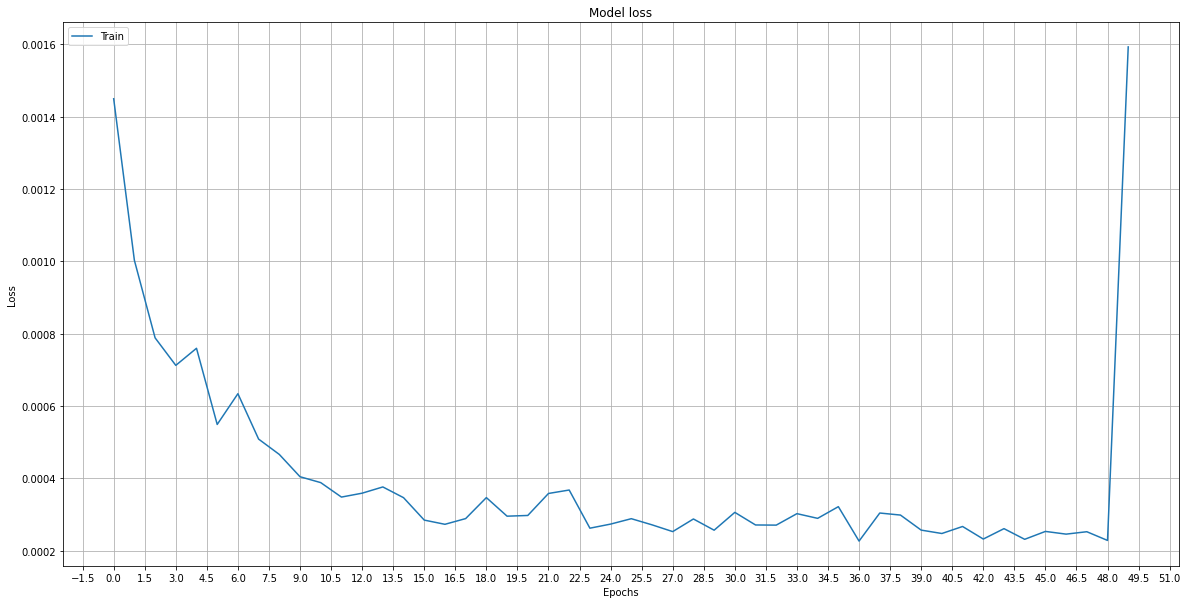

[0.001449465285986662, 0.0010029906406998634, 0.0007887213723734021, 0.0007126338314265013, 0.0007598698139190674, 0.0005493595963343978, 0.0006343789864331484, 0.0005088966572657228, 0.00046647837734781206, 0.00040488026570528746, 0.00038860394852235913, 0.0003486394416540861, 0.0003594073932617903, 0.00037664867704734206, 0.0003469838702585548, 0.0002850264427252114, 0.00027340868837200105, 0.00028921396005898714, 0.0003471920208539814, 0.00029586898745037615, 0.00029781676130369306, 0.00035862476215697825, 0.00036814328632317483, 0.000262668909272179, 0.00027398302336223423, 0.00028891515103168786, 0.0002719347248785198, 0.00025324177113361657, 0.00028811549418605864, 0.0002571076911408454, 0.00030639447504654527, 0.00027156242867931724, 0.000271136115770787, 0.00030283574596978724, 0.00028985642711631954, 0.0003221646184101701, 0.00022701174020767212, 0.0003045751655008644, 0.0002989373460877687, 0.00025736363022588193, 0.0002479809336364269, 0.0002673724084161222, 0.00023266293283

In [ ]:
def loss_plot(history):
  """Plot training & validation loss values"""
  
  print(history.history["loss"])

  fig = go.Figure(go.Scatter(
      y = history.history["loss"]
  ))
  fig.update_layout(
      title={
          'text': "Model Loss",
          'y':0.9,
          'x':0.5,
          'xanchor': 'center',
          'yanchor': 'top'},
          xaxis_title='Epochs',
                    yaxis_title='Loss')
  fig.show()


loss_plot(history)

In [ ]:
# Get the predicted values
y_pred_scaled = model.predict(x_test)
# Unscale the predicted values
y_pred = pred_scalar.inverse_transform(y_pred_scaled)
y_test_unscaled = pred_scalar.inverse_transform(y_test.reshape(-1, 1))

def get_errors(y_pred, y_test_unscaled):

  # Mean Absolute Error (MAE)
  MAE = mean_absolute_error(y_test_unscaled, y_pred)
  print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

  # Mean Absolute Percentage Error (MAPE)
  MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100
  print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

  # Median Absolute Percentage Error (MDAPE)
  MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100
  print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

  # Root Mean Square Error (RMSE)
  RMSE = np.sqrt(np.mean(np.square(np.subtract(y_test_unscaled, y_pred))))
  print(f'Root Mean Square Error (RMSE): {np.round(RMSE, 2)} %')

get_errors(y_pred, y_test_unscaled)

Median Absolute Error (MAE): 7.68
Mean Absolute Percentage Error (MAPE): 2.63 %
Median Absolute Percentage Error (MDAPE): 2.14 %
Root Mean Square Error (RMSE): 11.42 %
Accuracy : 96.6 %


In [ ]:
# starting date for testing data
display_start_date = pd.Timestamp('today') - dt.timedelta(days=500)


data_filtered_sub = data_filtered.copy()
data_filtered_sub['Date'] = date_index

train = data_filtered_sub[:train_data_length + 1]
valid = data_filtered_sub[train_data_length:]
valid.insert(1, "Prediction", y_pred.ravel(), True)
valid.insert(1, "Difference", valid["Prediction"] - valid["Ltp"], True)

In [ ]:
data_filtered

,High,Open,Low,Qty,Ltp
0,790.0,408.0,790.0,10.0,790.0
1,770.0,790.0,740.0,50.0,740.0
2,726.0,740.0,687.0,50.0,687.0
3,674.0,687.0,661.0,20.0,661.0
4,701.0,661.0,648.0,3230.0,700.0
...,...,...,...,...,...
2741,424.8,420.0,407.0,124757.0,422.0
2742,431.9,429.0,416.9,111687.0,417.2
2743,417.0,417.0,395.0,118072.0,395.7
2744,402.9,396.0,384.0,117403.0,389.1


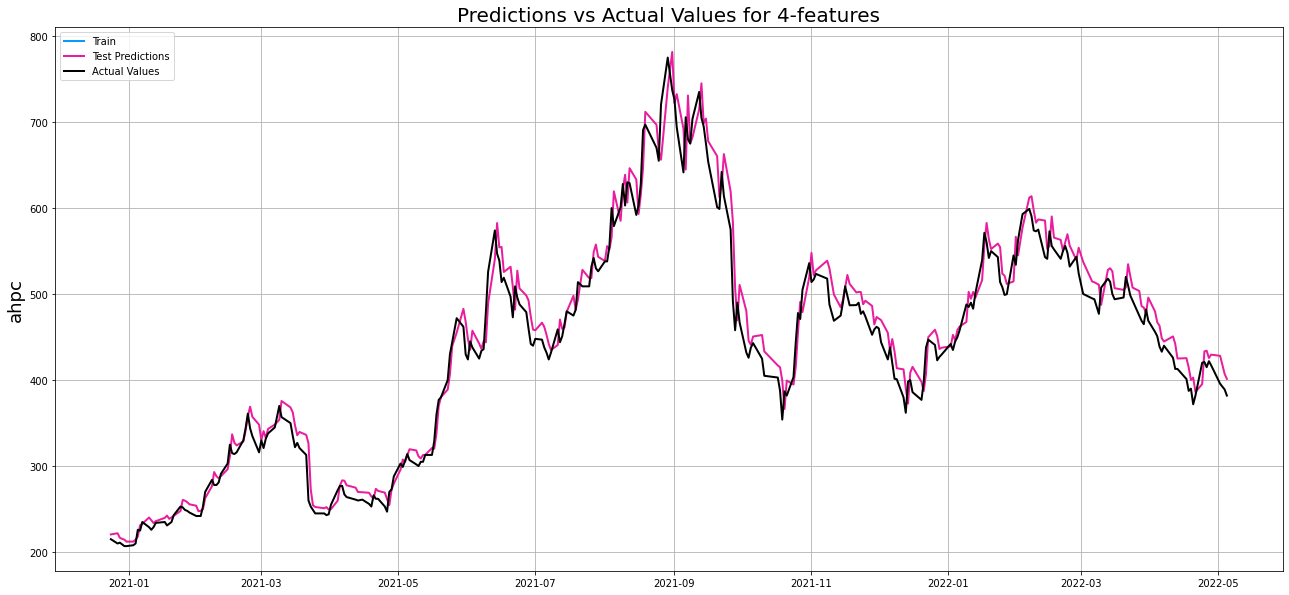

In [ ]:
# Zoom in to a closer timeframe
valid = valid[valid['Date'] > display_start_date]
train = train[train['Date'] > display_start_date]

# Visualize the data
fig, ax1 = plt.subplots(figsize=(22, 10), sharex=True)
xt = train['Date']; yt = train[["Ltp"]]
xv = valid['Date']; yv = valid[["Ltp", "Prediction"]]
plt.title("Predictions vs Actual Values for 4-features", fontsize=20)
plt.ylabel('ahpc', fontsize=18)
plt.plot(xt, yt, color="#039dfc", linewidth=2.0)
plt.plot(xv, yv["Prediction"], color="#E91D9E", linewidth=2.0)
plt.plot(xv, yv["Ltp"], color="black", linewidth=2.0)
plt.legend(["Train", "Test Predictions", "Actual Values"], loc="upper left")

plt.grid()
plt.show()

In [ ]:
valid

,High,Difference,Prediction,Open,Low,Qty,Ltp,Date
2197,96.0,1.932510,97.932510,96.0,95.0,1551.0,96.0,2012-07-30
2198,104.0,-5.647675,98.352325,97.0,96.0,670.0,104.0,2012-07-29
2199,102.0,4.640846,103.640846,102.0,98.0,1084.0,99.0,2012-07-26
2200,98.0,4.223793,102.223793,98.0,98.0,50.0,98.0,2012-07-25
2201,97.0,5.945015,100.945015,97.0,94.0,10089.0,95.0,2012-07-24
...,...,...,...,...,...,...,...,...
2741,424.8,3.677124,425.677124,420.0,407.0,124757.0,422.0,2009-12-08
2742,431.9,12.436780,429.636780,429.0,416.9,111687.0,417.2,2009-12-07
2743,417.0,32.493298,428.193298,417.0,395.0,118072.0,395.7,2009-12-06
2744,402.9,18.137213,407.237213,396.0,384.0,117403.0,389.1,2009-12-03


In [ ]:
import os
import keras
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/Final Project/4-variariate-model')

INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Final Project/4-variariate-model/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Final Project/4-variariate-model/assets


# For 5-features ['High', 'Open', 'Low','Qty','Ltp']

FEATURE LIST : ['High', 'Open', 'Low', 'Qty', 'Ltp']
(2147, 50, 5) (2147,)
(549, 50, 5) (549,)
0.007153075822603716
0.007153075822603716
250 50 5
Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_100 (LSTM)             (None, 50, 250)           256000    
                                                                 
 lstm_101 (LSTM)             (None, 250)               501000    
                                                                 
 dense_100 (Dense)           (None, 25)                6275      
                                                                 
 dense_101 (Dense)           (None, 1)                 26        
                                                                 
Total params: 763,301
Trainable params: 763,301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
135/135 [========

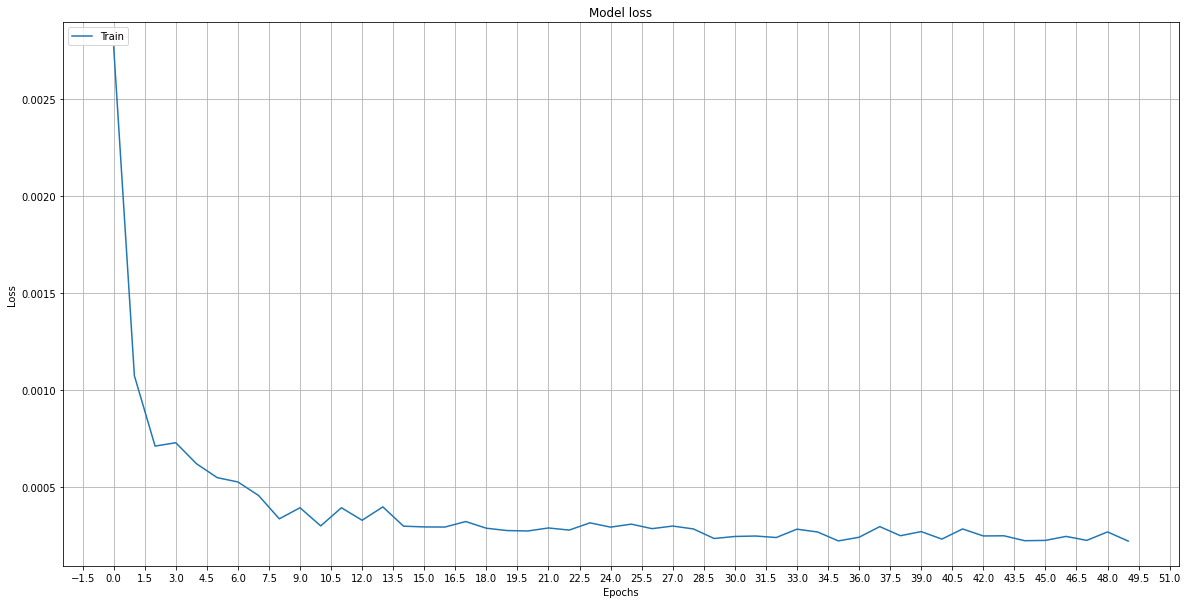

[0.00276866159401834, 0.0010721387807279825, 0.0007088356651365757, 0.0007260679849423468, 0.0006177696050144732, 0.0005460591637529433, 0.0005236400756984949, 0.00045369783765636384, 0.0003334428765811026, 0.00039067299803718925, 0.0002970462082885206, 0.0003906800411641598, 0.0003260551893617958, 0.0003951453836634755, 0.0002955808013211936, 0.00029169590561650693, 0.00029106251895427704, 0.00031951171695254743, 0.0002849794109351933, 0.0002729698608163744, 0.00027083599707111716, 0.0002863026747945696, 0.0002753569569904357, 0.00031271527404896915, 0.00029061464010737836, 0.0003060695598833263, 0.00028274781652726233, 0.00029618621920235455, 0.00028131724684499204, 0.00023194006644189358, 0.0002424253907520324, 0.0002448128361720592, 0.00023699678422417492, 0.0002801172377076, 0.00026548720779828727, 0.00021952051611151546, 0.0002383619430474937, 0.0002933286887127906, 0.00024634425062686205, 0.0002675791329238564, 0.0002288556715939194, 0.00028126678080298007, 0.0002451617328915745

Median Absolute Error (MAE): 24.02
Mean Absolute Percentage Error (MAPE): 7.68 %
Median Absolute Percentage Error (MDAPE): 6.92 %
Root Mean Square Error (RMSE): 39.1 %
Accuracy : 90.5 %


In [ ]:
features = ['High', 'Open', 'Low','Qty','Ltp']
history2, model2, y_pred2, y_test2, data_filtered, train_data_length, date_index  = train_and_predict(final_df, features, train_split=0.8, timesteps=50, batch_size=16, epochs=50)
loss_plot(history2)
get_errors(y_pred2, y_test2)
plot_prediction(data_filtered,train_data_length, date_index, y_pred2, y_test2, '5-Features')

In [ ]:
plot_prediction(data_filtered,train_data_length, date_index, y_pred2, y_test2, '5-Features')

In [ ]:
model2.save('/content/drive/My Drive/Colab Notebooks/Final Project/5-variariate-modelf')

INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Final Project/5-variariate-modelf/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Final Project/5-variariate-modelf/assets


# For 4-features ('High', '% Change', 'Qty','Ltp')

In [ ]:
def fourfeature2(final_df, train_split=0.8, timesteps=50, batch_size=16, epochs=50):
  features = ['High', '% Change', 'Qty','Ltp']
  history4, model4, y_pred4, y_test4, data_filtered4, train_data_length4, date_index4  = train_and_predict(final_df, features, train_split=0.8, timesteps=50, batch_size=16, epochs=50)
  loss_plot(history4)
  get_errors(y_pred4, y_test4)
  plot_prediction(data_filtered4,train_data_length4, date_index4, y_pred4, y_test4, '[High, % Change, Qty, Ltp]')

In [ ]:
def fourfeature(final_df, train_split, timesteps, batch_size, epochs):
  features = ['High', 'Open', 'Low','Ltp']
  history4, model4, y_pred4, y_test4, data_filtered4, train_data_length4, date_index4  = train_and_predict(final_df, features, train_split, timesteps, batch_size, epochs)
  loss_plot(history4)
  get_errors(y_pred4, y_test4)
  print(y_pred4)
  plot_prediction(data_filtered4,train_data_length4, date_index4, y_pred4, y_test4, '[high, Low, Open, Ltp]')

In [ ]:
features = ['High', '% Change', 'Qty','Ltp']
history4, model4, y_pred4, y_test4, data_filtered4, train_data_length4, date_index4  = train_and_predict(final_df, features, train_split=0.8, timesteps=50, batch_size=16, epochs=50)
loss_plot(history4)
get_errors(y_pred4, y_test4)
plot_prediction(data_filtered4,train_data_length4, date_index4, y_pred4, y_test4, '[High, % Change, Qty, Ltp]')

FEATURE LIST : ['High', '% Change', 'Qty', 'Ltp']
(2147, 50, 4) (2147,)
(549, 50, 4) (549,)
0.007153075822603716
0.007153075822603716
200 50 4
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50, 200)           164000    
                                                                 
 lstm_3 (LSTM)               (None, 200)               320800    
                                                                 
 dense_2 (Dense)             (None, 25)                5025      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 489,851
Trainable params: 489,851
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
135/135 [============

Median Absolute Error (MAE): 16.74
Mean Absolute Percentage Error (MAPE): 4.67 %
Median Absolute Percentage Error (MDAPE): 3.55 %
Root Mean Square Error (RMSE): 28.97 %
Accuracy : 93.7 %


In [ ]:
plot_prediction(data_filtered4,train_data_length4, date_index4, y_pred4, y_test4, '[High, % Change, Qty, Ltp]')

# For 3-features

In [ ]:
def three_f(final_df, train_split=0.8, timesteps=50, batch_size=16, epochs=50):
  features = ['High', '% Change', 'Qty']
  history3, model3, y_pred3, y_test3, data_filtered3, train_data_length3, date_index3  = train_and_predict(final_df, features, train_split=0.8, timesteps=50, batch_size=16, epochs=50)
  loss_plot(history3)
  get_errors(y_pred3, y_test3)
  plot_prediction(data_filtered3,train_data_length3, date_index3, y_pred3, y_test3, '3-features')

In [ ]:
features = ['High', '% Change', 'Qty']
history3, model3, y_pred3, y_test3, data_filtered3, train_data_length3, date_index3  = train_and_predict(final_df, features, train_split=0.8, timesteps=50, batch_size=16, epochs=50)
loss_plot(history3)
get_errors(y_pred3, y_test3)
plot_prediction(data_filtered3,train_data_length3, date_index3, y_pred3, y_test3, '3-features')

FEATURE LIST : ['High', '% Change', 'Qty']
(2147, 50, 3) (2147,)
(549, 50, 3) (549,)
0.007153075822603716
0.007153075822603716
150 50 3
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50, 150)           92400     
                                                                 
 lstm_3 (LSTM)               (None, 150)               180600    
                                                                 
 dense_2 (Dense)             (None, 25)                3775      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 276,801
Trainable params: 276,801
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
135/135 [===================

Median Absolute Error (MAE): 13.23
Mean Absolute Percentage Error (MAPE): 4.02 %
Median Absolute Percentage Error (MDAPE): 3.32 %
Root Mean Square Error (RMSE): 22.79 %
Accuracy : 94.8 %


In [ ]:
plot_prediction(data_filtered3,train_data_length3, date_index3, y_pred3, y_test3, '3-features')

Testing with 60 timesteps

FEATURE LIST : ['High', '% Change', 'Qty']
(2147, 50, 3) (2147,)
(549, 50, 3) (549,)
0.007153075822603716
0.007153075822603716
150 50 3
Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_102 (LSTM)             (None, 50, 150)           92400     
                                                                 
 lstm_103 (LSTM)             (None, 150)               180600    
                                                                 
 dense_102 (Dense)           (None, 25)                3775      
                                                                 
 dense_103 (Dense)           (None, 1)                 26        
                                                                 
Total params: 276,801
Trainable params: 276,801
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
135/135 [==================

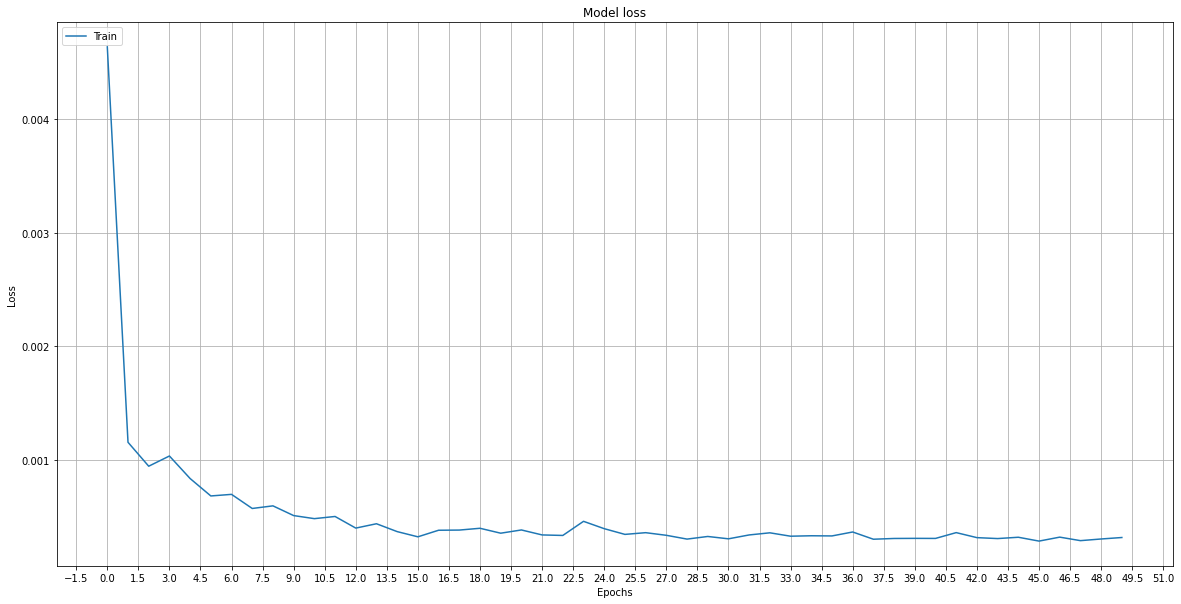

[0.004635716322809458, 0.0011555522214621305, 0.0009450024226680398, 0.0010349006624892354, 0.0008365607354789972, 0.000683230406139046, 0.0006971464026719332, 0.0005730728153139353, 0.0005960503476671875, 0.0005104450974613428, 0.00048349722055718303, 0.0005025755381211638, 0.0004002946661785245, 0.0004385426000226289, 0.0003693553735502064, 0.0003235527838114649, 0.0003813641960732639, 0.00038292311364784837, 0.0003987067611888051, 0.0003554278227966279, 0.0003838922129943967, 0.00034011827665381134, 0.0003355990338604897, 0.0004598740488290787, 0.00039520100108347833, 0.0003449140931479633, 0.000359945697709918, 0.0003368341422174126, 0.0003034812689293176, 0.0003265917475800961, 0.00030590599635615945, 0.00033998736762441695, 0.0003587727260310203, 0.00032891606679186225, 0.00033280366915278137, 0.00033130351221188903, 0.00036601355532184243, 0.0003023412136826664, 0.0003089912934228778, 0.0003099145251326263, 0.0003093923442065716, 0.0003604800731409341, 0.0003163319197483361, 0.0

Median Absolute Error (MAE): 13.02
Mean Absolute Percentage Error (MAPE): 4.21 %
Median Absolute Percentage Error (MDAPE): 3.53 %
Root Mean Square Error (RMSE): 22.23 %
Accuracy : 94.6 %


In [ ]:
three_f(final_df, train_split=0.8, timesteps=60, batch_size=16, epochs=50)

FEATURE LIST : ['High', 'Open', 'Low', 'Ltp']
(2147, 50, 4) (2147,)
(549, 50, 4) (549,)
0.007153075822603716
0.007153075822603716
200 50 4
Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_104 (LSTM)             (None, 50, 200)           164000    
                                                                 
 lstm_105 (LSTM)             (None, 200)               320800    
                                                                 
 dense_104 (Dense)           (None, 25)                5025      
                                                                 
 dense_105 (Dense)           (None, 1)                 26        
                                                                 
Total params: 489,851
Trainable params: 489,851
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
135/135 [===============

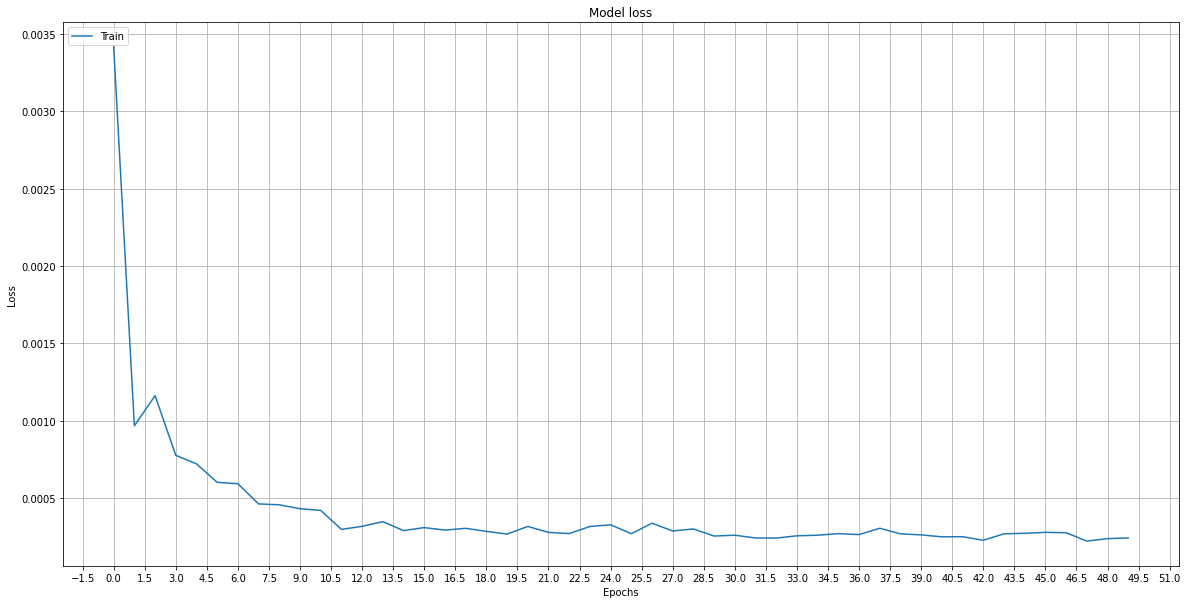

[0.0034172581508755684, 0.0009662426309660077, 0.001161127001978457, 0.0007747794152237475, 0.0007198764360509813, 0.0006001419969834387, 0.0005915019428357482, 0.0004605941940099001, 0.0004549329460132867, 0.00042962608858942986, 0.0004187124432064593, 0.0002958927070721984, 0.00031575560569763184, 0.00034604035317897797, 0.0002878633385989815, 0.0003074421838391572, 0.00029135184013284743, 0.0003027334751095623, 0.0002829268341884017, 0.00026551212067715824, 0.00031484125065617263, 0.00027653767028823495, 0.00026881787925958633, 0.000314567907480523, 0.0003255555348005146, 0.00026810032431967556, 0.0003357006353326142, 0.0002854878839571029, 0.000298625003779307, 0.0002529610355850309, 0.0002581726876087487, 0.00024023978039622307, 0.00023969764879439026, 0.00025427917717024684, 0.0002583714376669377, 0.0002684099890757352, 0.00026226614136248827, 0.0003031550731975585, 0.0002671144320629537, 0.00026030291337519884, 0.0002477731613907963, 0.00024856411619111896, 0.0002254651190014556

Median Absolute Error (MAE): 8.57
Mean Absolute Percentage Error (MAPE): 2.92 %
Median Absolute Percentage Error (MDAPE): 2.33 %
Root Mean Square Error (RMSE): 12.8 %
Accuracy : 96.1 %


In [ ]:
fourfeature(final_df, train_split=0.8, timesteps=60, batch_size=16, epochs=50)

Testing For larger batch size

FEATURE LIST : ['High', 'Open', 'Low', 'Ltp']
(2147, 50, 4) (2147,)
(549, 50, 4) (549,)
0.007153075822603716
0.007153075822603716
200 50 4
Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_106 (LSTM)             (None, 50, 200)           164000    
                                                                 
 lstm_107 (LSTM)             (None, 200)               320800    
                                                                 
 dense_106 (Dense)           (None, 25)                5025      
                                                                 
 dense_107 (Dense)           (None, 1)                 26        
                                                                 
Total params: 489,851
Trainable params: 489,851
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
135/135 [===============

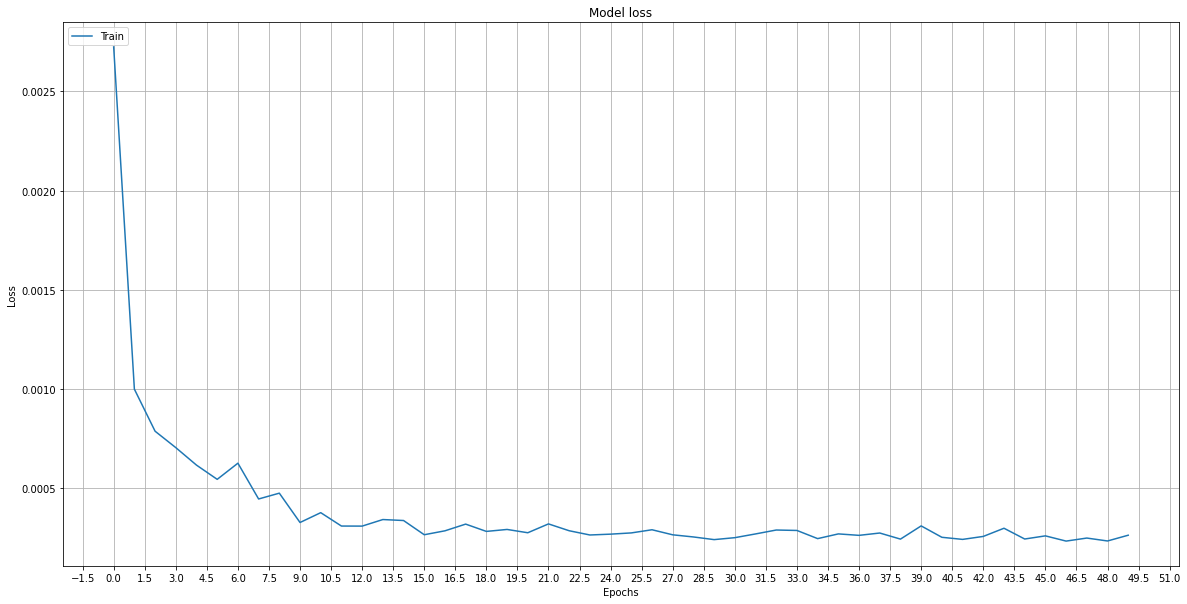

[0.0027230659034103155, 0.0009997044689953327, 0.0007878947071731091, 0.0007052654400467873, 0.0006171910208649933, 0.0005455577047541738, 0.000626909255515784, 0.0004466786631383002, 0.00047596637159585953, 0.0003282393445260823, 0.0003777826204895973, 0.0003103843773715198, 0.0003100733447354287, 0.0003431221703067422, 0.0003382486756891012, 0.0002666219661477953, 0.0002863788104150444, 0.00032015220494940877, 0.00028340017888695, 0.00029326131334528327, 0.00027663851506076753, 0.0003211658913642168, 0.00028671915060840547, 0.0002653675037436187, 0.000269583921181038, 0.0002758060290943831, 0.0002917089150287211, 0.0002662410552147776, 0.0002554554957896471, 0.0002420510136289522, 0.00025185762206092477, 0.0002706722589209676, 0.0002903708373196423, 0.0002881963737308979, 0.00024707126431167126, 0.0002708458050619811, 0.0002635262790136039, 0.0002752585569396615, 0.0002446087310090661, 0.0003111049300059676, 0.0002537666296120733, 0.00024319275689776987, 0.00025813578395172954, 0.000

Median Absolute Error (MAE): 7.83
Mean Absolute Percentage Error (MAPE): 2.83 %
Median Absolute Percentage Error (MDAPE): 2.3 %
Root Mean Square Error (RMSE): 11.38 %
Accuracy : 96.39999999999999 %


In [ ]:
fourfeature(final_df, train_split=0.8, timesteps=50, batch_size=64, epochs=50)


# **For single prediction**


In [ ]:
split = 2744/2746

In [ ]:
features = ['High', 'Open', 'Low','Ltp']
history4, model4, y_pred4, y_test4, data_filtered4, train_data_length4, date_index4  = train_and_predict(final_df, features, split, 50, 32, 50)
loss_plot(history4)
get_errors(y_pred4, y_test4)
print(y_pred4)
plot_prediction(data_filtered4,train_data_length4, date_index4, y_pred4, y_test4, '[high, Low, Open, Ltp]')

FEATURE LIST : ['High', 'Open', 'Low', 'Ltp']
(2695, 50, 4) (2695,)
(1, 50, 4) (1,)
200 50 4
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 50, 200)           164000    
                                                                 
 lstm_9 (LSTM)               (None, 200)               320800    
                                                                 
 dense_8 (Dense)             (None, 25)                5025      
                                                                 
 dense_9 (Dense)             (None, 1)                 26        
                                                                 
Total params: 489,851
Trainable params: 489,851
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
85/85 [==============================] - 31s 292ms/step - loss: 0.0046 

Median Absolute Error (MAE): 4.46
Mean Absolute Percentage Error (MAPE): 1.13 %
Median Absolute Percentage Error (MDAPE): 1.13 %
Root Mean Square Error (RMSE): 4.46 %
Accuracy : 98.9 %
[[400.90082]]


In [ ]:
features = ['High', 'Open', 'Low','Ltp']
history4, model4, y_pred4, y_test4, data_filtered4, train_data_length4, date_index4  = train_and_predict(final_df, features, split, 50, 32, 30)
loss_plot(history4)
get_errors(y_pred4, y_test4)
print(y_pred4)

FEATURE LIST : ['High', 'Open', 'Low', 'Ltp']
(2694, 50, 4) (2694,)
(2, 50, 4) (2,)
200 50 4
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50, 200)           164000    
                                                                 
 lstm_5 (LSTM)               (None, 200)               320800    
                                                                 
 dense_4 (Dense)             (None, 25)                5025      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 489,851
Trainable params: 489,851
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
85/85 [==============================] - 28s 282ms/step - loss: 0.0045 

In [ ]:
get_errors(y_pred4, y_test4)
print(y_pred4)

Median Absolute Error (MAE): 4.35
Mean Absolute Percentage Error (MAPE): 1.09 %
Median Absolute Percentage Error (MDAPE): 1.09 %
Root Mean Square Error (RMSE): 4.35
[[397.90906]
 [392.17203]]


In [ ]:
plot_prediction(data_filtered4,train_data_length4, date_index4, y_pred4, y_test4, 'Prediction for 2022 May 05')

In [ ]:
x_test

array([[[0.67095851, 0.64102564, 0.65714286, 0.64428571],
        [0.69098712, 0.64672365, 0.65971429, 0.69      ],
        [0.68955651, 0.65840456, 0.68428571, 0.66571429],
        [0.67195994, 0.65242165, 0.66      , 0.66      ],
        [0.66380544, 0.62962963, 0.64428571, 0.64428571],
        [0.66080114, 0.64387464, 0.65      , 0.65714286],
        [0.6795422 , 0.64245014, 0.64142857, 0.66571429],
        [0.66938484, 0.6542735 , 0.66      , 0.65428571],
        [0.65379113, 0.62962963, 0.64728571, 0.63142857],
        [0.65665236, 0.63105413, 0.64657143, 0.64771429],
        [0.67811159, 0.61538462, 0.66314286, 0.62      ],
        [0.63433476, 0.58547009, 0.63485714, 0.586     ],
        [0.60515021, 0.57279202, 0.58571429, 0.57857143],
        [0.58941345, 0.56566952, 0.56442857, 0.57714286],
        [0.58655222, 0.54700855, 0.58571429, 0.55285714],
        [0.61945637, 0.54415954, 0.55285714, 0.59642857],
        [0.62088698, 0.5977208 , 0.61085714, 0.61142857],
        [0.619

# FOR ADBL

In [ ]:
adbl = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Stock Prediction/adbl.csv')
adbl[adbl.columns[2:]] = adbl[adbl.columns[2:]].replace(',','',regex=True).astype('float64')
adbl.drop(['S.N.'], axis = 1, inplace=True)
adbl.Date = pd.to_datetime(adbl.Date)
adbl = adbl.reindex(index=adbl.index[::-1])

final_adbldf = adbl.copy()




In [ ]:
split = (adbl.shape[0]-2/adbl.shape[0])

In [ ]:
df = adbl
fig = go.Figure(go.Scatter(
    x = df['Date'],
    y = df['Ltp']
))
fig.update_xaxes(
    dtick="M12",
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.update_layout(
    title={
        'text': "LTP lineplot of Arun Valley Hydropower Development Co. Ltd. (AHPC)",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis_title='Time',
                   yaxis_title='Last Transaction Price (Rs)')
fig.show()

In [ ]:
features = ['High', 'Open', 'Low','Ltp']
history, model, y_pred, y_test, data_filtered, train_data_length, date_index  = train_and_predict(adbl, features, split, 50, 32, 30)
loss_plot(history)

FEATURE LIST : ['High', 'Open', 'Low', 'Ltp']
(2604, 50, 4) (2604,)
(0,) (0,)
200 50 4
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 50, 200)           164000    
                                                                 
 lstm_10 (LSTM)              (None, 200)               320800    
                                                                 
 dense_8 (Dense)             (None, 25)                5025      
                                                                 
 dense_9 (Dense)             (None, 1)                 26        
                                                                 
Total params: 489,851
Trainable params: 489,851
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
82/82 [==============================] - 26s 256ms/step - loss: 0.0040
Epoch 

ValueError: ignored

In [ ]:
features = ['High', 'Open', 'Low','Ltp']
history4, model4, y_pred4, y_test4, data_filtered4, train_data_length4, date_index4  = train_and_predict(adbl, features, 0.8, 50, 32, 50)
loss_plot(history4)

FEATURE LIST : ['High', 'Open', 'Low', 'Ltp']
(2074, 50, 4) (2074,)
(530, 50, 4) (530,)
200 50 4
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 50, 200)           164000    
                                                                 
 lstm_12 (LSTM)              (None, 200)               320800    
                                                                 
 dense_10 (Dense)            (None, 25)                5025      
                                                                 
 dense_11 (Dense)            (None, 1)                 26        
                                                                 
Total params: 489,851
Trainable params: 489,851
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
65/65 [==============================] - 29s 387ms/step - loss: 0.0

In [ ]:
get_errors(y_pred4, y_test4)
plot_prediction(data_filtered4,train_data_length4, date_index4, y_pred4, y_test4, '[high, Low, Open, Ltp]')

Median Absolute Error (MAE): 6.38
Mean Absolute Percentage Error (MAPE): 1.44 %
Median Absolute Percentage Error (MDAPE): 1.05 %
Root Mean Square Error (RMSE): 9.66


In [ ]:
plot_prediction(data_filtered4,train_data_length4, date_index4, y_pred4, y_test4, '[high, Low, Open, Ltp]')

          Date  Predicted Price  Actual Price
324 2020-12-27       489.581818         493.0
323 2020-12-28       486.192749         492.0
322 2020-12-29       484.699158         488.0
321 2020-12-30       482.536591         422.0
320 2020-12-31       424.515228         425.0
..         ...              ...           ...
4   2022-04-27       368.975372         371.0
3   2022-04-28       365.001221         369.0
2   2022-05-02       365.516724         364.0
1   2022-05-04       360.066406         361.0
0   2022-05-05       357.240997         356.3

[325 rows x 3 columns]


In [ ]:
get_errors(y_pred, y_test)
print(y_pred)

In [ ]:
plot_prediction(data_filtered,train_data_length, date_index, y_pred, y_test, 'Prediction for 2022 May 05')

# Single **Function**


In [ ]:
def load_preprocess(company_symbol):
  from google.colab import drive
  drive.mount('/content/drive')
  company = pd.read_csv(f'/content/drive/My Drive/Colab Notebooks/Stock Prediction/{company_symbol}.csv')
  company[company.columns[2:]] = company[company.columns[2:]].replace(',','',regex=True).astype('float64')
  company = company.drop(['S.N.'], axis = 1)
  company.Date = pd.to_datetime(company.Date)
  company = company.reindex(index=company.index[::-1])
  return company

In [ ]:
def train_and_predict(df, features, train_split, timesteps, batch_size, epochs):
  print(f'FEATURE LIST : {features}') 
  flag = False
  if not 'Ltp'in features:
    flag = True
    features.append('Ltp')
  data_filtered = df[features]

  data_filtered_ext = data_filtered.copy()
  data_filtered_ext['Prediction'] = data_filtered_ext['Ltp']

  final_df = df.copy()

  date_index = final_df['Date']

  final_df = final_df.reset_index(drop=True).copy()

  df_ltp = data_filtered.filter(['Ltp'])
  unscaled_data = data_filtered.values

  mmscaler = MinMaxScaler(feature_range=(0, 1))
  scaled_data = mmscaler.fit_transform(unscaled_data)

  pred_scalar = MinMaxScaler()
  ltp_scaled = pred_scalar.fit_transform(df_ltp)

  n_past_days = timesteps
  train_data_length = math.ceil(scaled_data.shape[0] * train_split)

  train_data = scaled_data[0:train_data_length, :]
  test_data = scaled_data[train_data_length - n_past_days:, :]
  if flag:
    train_data = np.delete(train_data, -1, axis=1) 
    test_data = np.delete(test_data, -1, axis=1) # remove ltp from training data

  index_Close = df_ltp.columns.get_loc("Ltp")

  def sliding_window(n_past_days, scaled_df_array):
    x, y = [], []
    data_len = scaled_df_array.shape[0]
    for i in range(n_past_days, data_len):
        x.append(scaled_df_array[i-n_past_days:i,:]) 
        y.append(scaled_df_array[i, index_Close]) 
    x = np.array(x)
    y = np.array(y)
    return x, y

  x_train, y_train = sliding_window(n_past_days, train_data)
  x_test, y_test = sliding_window(n_past_days, test_data)

  print(x_train.shape, y_train.shape)
  print(x_test.shape, y_test.shape)

  # print(x_test[1][n_past_days-1][index_Close])
  # print(y_test[0])

  model = Sequential()

  n_units = x_train.shape[1] * x_train.shape[2]
  print(n_units, x_train.shape[1], x_train.shape[2])
  model.add(LSTM(n_units, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
  model.add(LSTM(n_units, return_sequences=False))
  model.add(Dense(25, activation="relu"))
  model.add(Dense(1))

  model.compile(optimizer="adam", loss="mean_squared_error")
  print(model.summary())

  early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
  history = model.fit(x_train, y_train, 
                      batch_size=batch_size, 
                      epochs=epochs,
                      validation_data=(x_test, y_test)
                    )

  y_pred_scaled = model.predict(x_test)
  y_pred = pred_scalar.inverse_transform(y_pred_scaled)
  y_test_unscaled = pred_scalar.inverse_transform(y_test.reshape(-1, 1))

  return history, model, y_pred, y_test_unscaled, data_filtered, train_data_length, date_index

In [ ]:
def loss_plot(history):
  """Plot training & validation loss values"""

  fig = go.Figure(go.Scatter(
      y = history.history["loss"]
  ))
  fig.update_layout(
      title={
          'text': "Model Loss",
          'y':0.9,
          'x':0.5,
          'xanchor': 'center',
          'yanchor': 'top'},
          xaxis_title='Epochs',
                    yaxis_title='Loss')
  fig.show()



In [ ]:
def get_errors(y_pred, y_test_unscaled):

  MAE = mean_absolute_error(y_test_unscaled, y_pred)
  print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

  MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100
  print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

  MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100
  print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

  RMSE = np.sqrt(np.mean(np.square(np.subtract(y_test_unscaled, y_pred))))
  print(f'Root Mean Square Error (RMSE): {np.round(RMSE, 2)}')


In [ ]:
def plot_prediction(data_filtered,train_data_length, date_index, y_pred, y_test_unscaled, text):

  data_filtered_sub = data_filtered.copy()
  # print(data_filtered_sub)

  data_filtered_sub['Date'] = date_index
  # data_filtered_sub["Date"] = data_filtered_sub["Date"].values[::-1]

  data_filtered_sub.sort_values(by='Date', inplace=True)
  data_filtered_sub['Date'] = pd.to_datetime(data_filtered_sub['Date'])
                                             
  display_start_date = data_filtered_sub['Date'].iloc[-1] - dt.timedelta(days=500)

  train = data_filtered_sub[:train_data_length + 1]
  valid = data_filtered_sub[train_data_length:]
  valid.insert(1, "Prediction", y_pred.ravel(), True)
  valid.insert(1, "Difference", valid["Prediction"] - valid["Ltp"], True)

  valid = valid[valid['Date'] > display_start_date]
 


  
  xv = pd.DataFrame(valid['Date'])
  # print(xv)
  yv = valid[["Ltp", "Prediction"]]
  # print(yv)

  data = [xv['Date'], yv['Prediction'], yv['Ltp']]
  headers = ["Date", "Predicted Price",'Actual Price']

  df3 = pd.concat(data, axis=1, keys=headers)
  # print(df3)
  # print(df3)

  #plot
  fig1 = px.line(df3, x="Date", y= ["Actual Price","Predicted Price"],              
                 hover_data={"Date": "|%B %d, %Y"})
  fig1.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
  fig1.update_layout(
    title={
        'text': f"Predictions vs Actual Values for {text}" ,
        'y': 0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis_title='Time',
                   yaxis_title='Last Transaction Price (Rs)',
      legend=dict(
        x=1,
        y=1,
        traceorder="reversed",
        title_font_family="Times New Roman",
        font=dict(
            family="Courier",
            size=12,
            color="black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="Black",
        borderwidth=2
    ),
    legend_title_text='Legend')
 
  fig1.show()  

In [ ]:
def fourfeature(final_df, train_split, timesteps, batch_size, epochs, company_symbol):
  features = ['High', 'Open', 'Low','Ltp']
  history4, model4, y_pred4, y_test4, data_filtered4, train_data_length4, date_index4  = train_and_predict(final_df, features, train_split, timesteps, batch_size, epochs)
  # loss_plot(history4)
  get_errors(y_pred4, y_test4)
  # print(y_pred4)
  plot_prediction(data_filtered4,train_data_length4, date_index4, y_pred4, y_test4, f'{company_symbol.upper()} [high, Low, Open, Ltp]')

# For Various Companies

CFCL

In [ ]:
cfcl = load_preprocess('cfcl')

Mounted at /content/drive


In [ ]:
fourfeature(cfcl, 0.8, 50, 32, 50, 'cfcl')

FEATURE LIST : ['High', 'Open', 'Low', 'Ltp']
(1498, 50, 4) (1498,)
(387, 50, 4) (387,)
200 50 4
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50, 200)           164000    
                                                                 
 lstm_3 (LSTM)               (None, 200)               320800    
                                                                 
 dense_2 (Dense)             (None, 25)                5025      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 489,851
Trainable params: 489,851
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
47/47 [==============================] - 18s 264ms/step - loss: 0.0

CBBL

In [ ]:
cbbl = load_preprocess('cbbl')
fourfeature(cbbl, 0.8, 50, 32, 50, 'cbbl')

Mounted at /content/drive
FEATURE LIST : ['High', 'Open', 'Low', 'Ltp']
(1746, 50, 4) (1746,)
(449, 50, 4) (449,)
200 50 4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 200)           164000    
                                                                 
 lstm_1 (LSTM)               (None, 200)               320800    
                                                                 
 dense (Dense)               (None, 25)                5025      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 489,851
Trainable params: 489,851
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
55/55 [==============================] - 21

NIL

In [ ]:
nil = load_preprocess('nil')

Mounted at /content/drive


In [ ]:
fourfeature(nil, 0.8, 50, 32, 50, 'nil')

FEATURE LIST : ['High', 'Open', 'Low', 'Ltp']
(1401, 50, 4) (1401,)
(362, 50, 4) (362,)
200 50 4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 200)           164000    
                                                                 
 lstm_1 (LSTM)               (None, 200)               320800    
                                                                 
 dense (Dense)               (None, 25)                5025      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 489,851
Trainable params: 489,851
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
44/44 [==============================] - 18s 302ms/step - loss: 0.013

BHBL

In [ ]:
bhbl = load_preprocess('bhbl')
fourfeature(bhbl, 0.8, 50, 32, 50, 'bhbl')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
FEATURE LIST : ['High', 'Open', 'Low', 'Ltp']
(657, 50, 4) (657,)
(176, 50, 4) (176,)
200 50 4
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 50, 200)           164000    
                                                                 
 lstm_21 (LSTM)              (None, 200)               320800    
                                                                 
 dense_20 (Dense)            (None, 25)                5025      
                                                                 
 dense_21 (Dense)            (None, 1)                 26        
                                                                 
Total params: 489,851
Trainable params: 489,851
Non-trainable params: 0
_____________________

NTC

In [ ]:
ntc = load_preprocess('ntc')
fourfeature(ntc, 0.8, 50, 32, 50, 'ntc')

Mounted at /content/drive
FEATURE LIST : ['High', 'Open', 'Low', 'Ltp']
(1969, 50, 4) (1969,)
(504, 50, 4) (504,)
200 50 4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 200)           164000    
                                                                 
 lstm_1 (LSTM)               (None, 200)               320800    
                                                                 
 dense (Dense)               (None, 25)                5025      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 489,851
Trainable params: 489,851
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
62/62 [==============================] - 20